# Homework 2: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

k-Nearest Neighbor (kNN) algorithm uses a simple idea: "you are what your neighbors are". In the first part of the assignment, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Part A: kNN Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [2]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with features `data` (a 150x4 matrix, where $i$-th row are 4 features of the $i$-th flower), `feature_names` (the names of the 4 features), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in machine learning people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [3]:
print (iris.DESCR)
print (iris.data)
print (iris.feature_names)
print (iris.target)
print (iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So, we can see that the features of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In machine learning, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 features and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose features are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it (it is guaranteed to run with Python 2.7).

<Figure size 432x288 with 0 Axes>

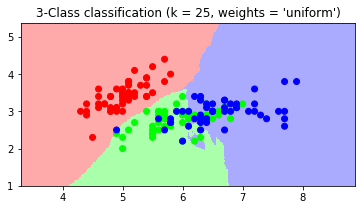

In [4]:
k = 25   # how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.

**Answer**: Changing value of k to 3 from 1, makes the decision surface smooth and the borders among the three classes are noticeable and bit more clear as compared to when k = 1. 

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

**Answer**: Changing k to 25 shows the boundaries among different regions more distinctly and clearly. The red class region size is more bigger now as compared to when k = 3. The green and blue class still overlap to some extent.

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.

**Answer**: weight='uniform' means all points in each class are equally weighted whereas weight='distance' means closer neighbors have a greater influence than neighbors which are further away.
Changing weight='distance' shows the decision areas are bit smoother now like few green points that were in blue region earlier are in green region now. The boundary between blue region and green region has become more even now.

**Question 4**. Take a look at the code and try to understand what each line of the code does. Explain each line of code.

**Answer**: 

k = 25 - k value is set i.e. the number of nearest neighbors to be consulted.

X = iris.data[:, [0,1]] - X contains the first two features i.e. the columns sepal length and sepal width.

y = iris.target - Label column 'y' contains the classes for the features.

h = .02 spacing distance between values.

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) - colormap used in plot(for decision surface).

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) - color map used in plot(for training points).

clf - An instance of Neighbours Classifier is created.

clf.fit(X, y) - Fit the data X and y to the classifier.

x_min, x_max - Define x_min, x_max as boundaries of x axis.

y_min, y_max - Define y_min, y_max as boundaries of y axis.

xx, yy - Meshgrid is created taking the min and max values of X and y.

Z = clf.predict - Predicted values for all mesh points.

Z = Z.reshape(xx.shape) - Reshape the matrix to correct shape.

plt.figure() - To create a figure object.

plt.figure(figsize=(6, 3)) - Figure with size 6 unit along width and 3 unit along height.

plt.pcolormesh(xx, yy, Z, cmap=cmap_light) - Show result into a color plot using light color scheme.

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold) - Show the training points using scatter with bold color scheme.

plt.xlim(xx.min(), xx.max()) - set x limits.

plt.ylim(yy.min(), yy.max()) - set y limits.

plt.title - Specify a title of the plot.

plt.show() - Show the plot.

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

**Question 5**. What is the size of the resulting objects?

In [6]:
print("X_train Size: {} ".format(X_train.shape))
print("X_test Size: {} ".format(X_test.shape))
print("y_train Size: {} ".format(y_train.shape))
print("y_test Size: {} ".format(y_test.shape))


X_train Size: (100, 2) 
X_test Size: (50, 2) 
y_train Size: (100,) 
y_test Size: (50,) 


Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [7]:
#from sklearn.neighbors import KNeighborsClassifier
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print (predictor)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [8]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print (x)
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
print (list(zip(yhat,y_test[i])))

[[5.6 2.7]
 [6.  3. ]
 [6.4 3.1]
 [4.8 3.4]]
[(2, 1), (2, 2), (2, 2), (0, 0)]


**Question 6**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 

**Answer**: 3 test examples out of 4 are predicted correctly. Accuracy rate is 75%.

**Question 7**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses


In [9]:
def accuracyFunc(y_predicted, y_actual):
    a = len(y_actual[(y_predicted==y_actual)])/len(y_actual)
    return a

In [10]:
print("Accuracy: {}".format(accuracyFunc(yhat, y_test[i])))

Accuracy: 0.75


**Question 8**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 7*.

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 7 and 8):

In [11]:
x = X_test
print (x)
# predict its label
yhat = predictor.predict(x)
print (list(zip(yhat,y_test)))
print("Accuracy: {}".format(accuracyFunc(yhat, y_test)))

[[5.6 2.7]
 [6.  3. ]
 [6.4 3.1]
 [4.8 3.4]
 [5.6 3. ]
 [5.2 4.1]
 [7.  3.2]
 [5.  3. ]
 [5.4 3.7]
 [6.6 2.9]
 [6.  2.9]
 [5.1 3.5]
 [4.4 3.2]
 [5.6 2.9]
 [6.3 3.3]
 [5.8 2.7]
 [5.4 3.9]
 [6.7 3. ]
 [5.  3.5]
 [6.8 2.8]
 [5.7 2.6]
 [6.2 2.9]
 [5.1 3.8]
 [6.3 2.8]
 [6.8 3.2]
 [5.2 3.5]
 [6.7 3.1]
 [5.8 2.7]
 [5.9 3.2]
 [5.5 2.6]
 [4.3 3. ]
 [6.  2.2]
 [4.9 3.1]
 [5.1 3.4]
 [6.  2.7]
 [5.5 2.4]
 [4.7 3.2]
 [5.4 3.4]
 [6.2 2.8]
 [6.1 2.6]
 [6.5 3. ]
 [5.  3.6]
 [7.2 3.2]
 [7.4 2.8]
 [5.8 2.7]
 [7.7 3. ]
 [6.3 2.5]
 [6.5 3.2]
 [6.9 3.1]
 [6.7 3.3]]
[(2, 1), (2, 2), (2, 2), (0, 0), (1, 1), (0, 0), (2, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 2), (2, 1), (0, 0), (1, 2), (0, 0), (2, 1), (1, 1), (2, 1), (0, 0), (2, 2), (2, 2), (0, 0), (2, 1), (2, 1), (2, 1), (1, 1), (0, 0), (1, 2), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 2), (1, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 1), (2, 2), (2, 2), (2, 2)]
Accuracy: 0.72


In [12]:
accuracy = predictor.score(X_test,y_test)
print (accuracy)

0.72


**Question 9**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

In [47]:
k_choices = [1, 3, 5, 15, 25, 50]
for k in k_choices:
    predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
    predictor.fit(X_train, y_train);
    accuracy = predictor.score(X_test,y_test)
    print (accuracy)

0.94
0.94
0.96
0.96
0.98
0.9


**Answer**: The highest accuracy of the model is when k = 25. The lowest accuracy is when k = 50. The accuracy differs every time we execute the model because the test data split/selection is different in each execution.

**Question 10**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.



**Answer**: 
Other than k, the options we can use when training the kNN classifier are -

**1**. algorithm - This can be 'auto', 'ball_tree, 'kd_tree' or 'brute'. ‘auto’ type will attempt to decide the most appropriate algorithm based on the values passed to the fit method.

**2**. leaf_size - This is passed for BallTree or KDTree type algorithm. This affects the speed of the construction, query and memory required to store the tree.

**3**. metric - This is used to calculate the distance between the data points. The default metric is minkowski and with p = 2 which is equivalent to the standard Euclidean metric.

**4**. p - This is the power parameter for Minkowski metric. When p = 1 this uses manhattan distance and when p = 2 it uses euclidean distance.

**5**. weights - This has 2 paramaters 'uniform' and 'distance'. uniform' means all points in each class are equally weighted and 'distance' means closer neighbors have a greater influence than neighbors which are further away.               

**Question 11**. Train kNN classifier on a different pair of features of your choice. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of features results in higher accuracy?


Pair of features:<br>
Sepal Length, Sepal Width (Feature 0 and Feature 1)<br>
Sepal Length, Petal Length (Feature 0 and Feature 2)<br>
Sepal Length, Petal Width (Feature 0 and Feature 3)<br>
Sepal Width, Petal Length (Feature 1 and Feature 2)<br>
Sepal Width, Petal Width (Feature 1 and Feature 3)<br>
Petal Length, Petal Width (Feature 2 and Feature 3)<br>

In [15]:
k = 25   # how many nearest neighbors are consulted
X = iris.data 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

features = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

for f in features:
    predictor = neighbors.KNeighborsClassifier(k, weights='uniform')
    predictor.fit(X_train[:, f], y_train)
    accuracy = predictor.score(X_test[:, f],y_test)
    print("Feature{}, Accuracy is: {}".format(f,accuracy))    

Feature[0, 1], Accuracy is: 0.72
Feature[0, 2], Accuracy is: 0.9
Feature[0, 3], Accuracy is: 0.84
Feature[1, 2], Accuracy is: 0.88
Feature[1, 3], Accuracy is: 0.98
Feature[2, 3], Accuracy is: 0.92


**Answer**: The pair of features that results in higher accuracy is [1,3] with accuracy of 98%.

**Question 12**. Train kNN classifier using all 4 features. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?

In [22]:
k = 3   # how many nearest neighbors are consulted
X = iris.data 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

predictor = neighbors.KNeighborsClassifier(k, weights='uniform')
predictor.fit(X_train, y_train)
accuracy = predictor.score(X_test,y_test)
print("With k = 3 and default choices, Accuracy is: {}".format(accuracy))  

With k = 3 and default choices, Accuracy is: 0.96


In [23]:
k = 25   # how many nearest neighbors are consulted
X = iris.data 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

predictor = neighbors.KNeighborsClassifier(k, weights='distance')
predictor.fit(X_train, y_train)
accuracy = predictor.score(X_test,y_test)
print("With k = 25 and weights = distance, Accuracy is: {}".format(accuracy))  

With k = 25 and weights = distance, Accuracy is: 0.98


## Part B: Write your own function for kNN (50% of the score)

**Question 13** Write a function for k-nearest neighbor (k-NN) classification of the form `accuracy = knnC(X_test, y_test, X_train, y_train, k)`, where *k* is the number of nearest neighbors. Assume the Euclidean distance. So, the inputs are training and test data and the output should be accuracy on test data. Repeat **Question 9** using your function. Check if the results are the same.
**NOTE:** I know that you can find python code for this on Web. However, I specifically ask you to write this function on your own and not use anybody's help. This is one of the rare ML algorithms that can be quickly implemented. I think you will learn a lot from this experience that will be very useful for the remainder of this course.


In [18]:
import math
def euclideanDistance(testdata, traindata):
    distance = 0
    for i in range(len(testdata) - 1):
        distance += ((testdata[i] - traindata[i])**2)
    return math.sqrt(distance)

In [19]:
import math
import operator

def knnC(X_test, y_test, X_train, y_train, k):
    yhat = []
    for i in range(len(X_test)): 
        neighbours = []
        distance = []
        for j in range(len(X_train)):
            dist = euclideanDistance(X_test[i], X_train[j])
            distance.append(((X_train[j], y_train[j]), dist))
            
        distance.sort(key=operator.itemgetter(1))
        for x in range(k):
            neighbours.append(distance[x][0])
            
        classVotes = [0, 0, 0]
        for i in range(len(neighbours)):
            response = neighbours[i][-1]
            classVotes[response] += 1
        index, value = max(enumerate(classVotes), key=operator.itemgetter(1))
        yhat.append(index)
    return (accuracyFunc(yhat, y_test))

In [50]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [51]:
k_choices = [1, 3, 5, 15, 25, 50]
for k in k_choices:
    accuracy = knnC(X_test, y_test, X_train, y_train, k)
    print(accuracy)

0.94
0.96
0.96
0.94
0.92
0.9
